<a href="https://colab.research.google.com/github/ncphung1405/PTDL-R/blob/main/ph%C3%A2n_t%C3%ADch_v%E1%BA%ADn_%C4%91%E1%BB%99ng_vi%C3%AAn_gi%C3%A0u_nh%E1%BA%A5t_h%C3%A0nh_tinh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



**Nội dung của khung dữ liệu**
   * **Name**: Chứa Tên các vận động viên có tên trong danh sách của Forbes
   * **Nationality**: Có quốc tịch của các vận động viên
   * **Earnings**: Thu nhập hàng năm của các vận động viên
   * **Year**: Năm
   * **Sport**: Thể thao liên kết với Vận động viên

In [4]:
df = pd.read_csv('hung.csv')

In [5]:
df.head(10)

,Name,Nationality,Earnings,Year,Sport
0,Aaron Donald,USA,36.0,2021,Football
1,Aaron Donald,USA,41.4,2019,Football
2,Aaron Rodgers,USA,30.1,2020,Football
3,Aaron Rodgers,USA,89.3,2019,Football
4,Aaron Rodgers,USA,19.1,2015,Football
5,Aaron Rodgers,USA,22.0,2014,Football
6,Aaron Rodgers,USA,49.0,2013,Football
7,Adam Scott,USA,17.7,2014,Golf
8,Adam Wainwright,USA,19.8,2015,Baseball
9,Adrian Gonzalez,USA,21.7,2017,Baseball


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1659 non-null   object 
 1   Nationality  1659 non-null   object 
 2   Earnings     1659 non-null   float64
 3   Year         1659 non-null   int64  
 4   Sport        1659 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 64.9+ KB


In [7]:
print('Number of athletes {}'.format(df.Name.nunique()))

Number of athletes 535


#Xác định một số chức năng trợ giúp

In [8]:
def groupby_func(index, col, func):
    groupby_data = df.groupby(index).agg({col:func})
    groupby_data.sort_values(by=col, ascending=False, inplace=True)
    return groupby_data

In [9]:
def barplot_func(dataset, y, rotation=int, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(14,8))
    g = sns.barplot(x=dataset.index, 
                    y=dataset[y], 
                    ci=None, 
                    palette='Set2')
    plt.xticks(rotation=rotation)
    plt.title(title, size=15, family='monospace')
    plt.xlabel(xlabel, size=10)
    plt.ylabel(ylabel, size=10)
    plt.show()
    return g

#Trung bình môn thể thao nào kiếm được nhiều tiền nhất?

In [10]:
hello = groupby_func(index='Sport', col='Earnings', func='mean')

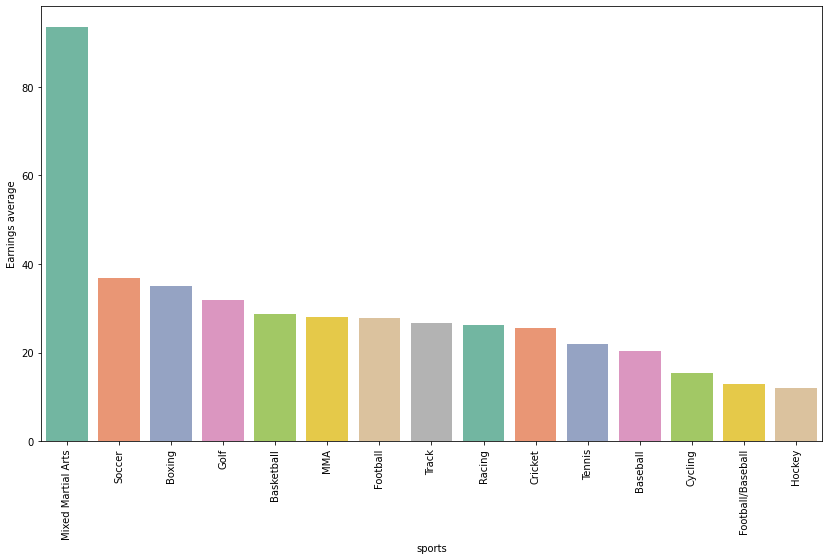

In [26]:
barplot_func(dataset=hello, y='Earnings', rotation=90, xlabel='sports', ylabel='Earnings average')

#Vận động viên giàu nhất là ai?

In [11]:
groupby2 = groupby_func(index='Name', col='Earnings', func='max')
groupby2 = groupby2.nlargest(10, 'Earnings')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 7845 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 7845 missing from current font.



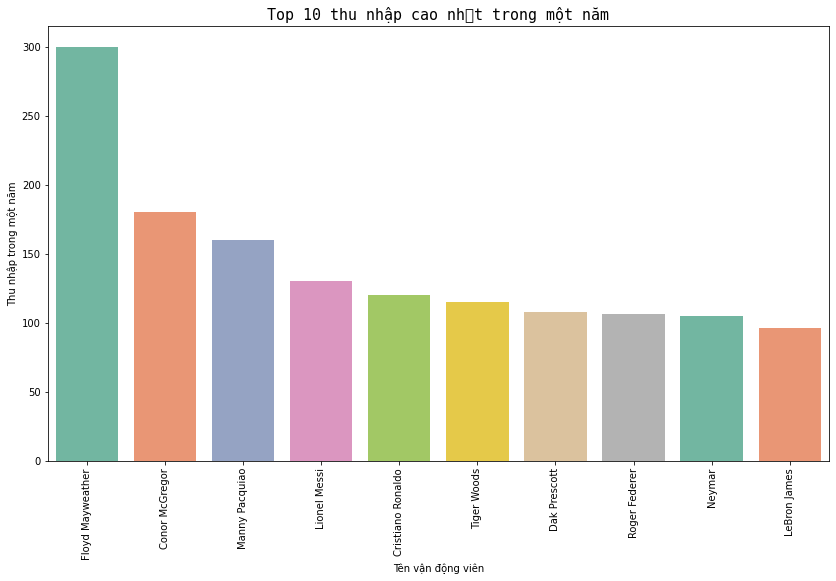

In [27]:
barplot_func(dataset=groupby2, 
             y='Earnings', 
             rotation=90, 
             title='Top 10 thu nhập cao nhất trong một năm', 
             xlabel='Tên vận động viên', 
             ylabel='Thu nhập trong một năm')

In [13]:
groupby3 = groupby_func(index='Name', col='Earnings', func='mean')
groupby3 = groupby3.nlargest(10, 'Earnings')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 7847 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 7847 missing from current font.
  font.set_text(s, 0, flags=flags)


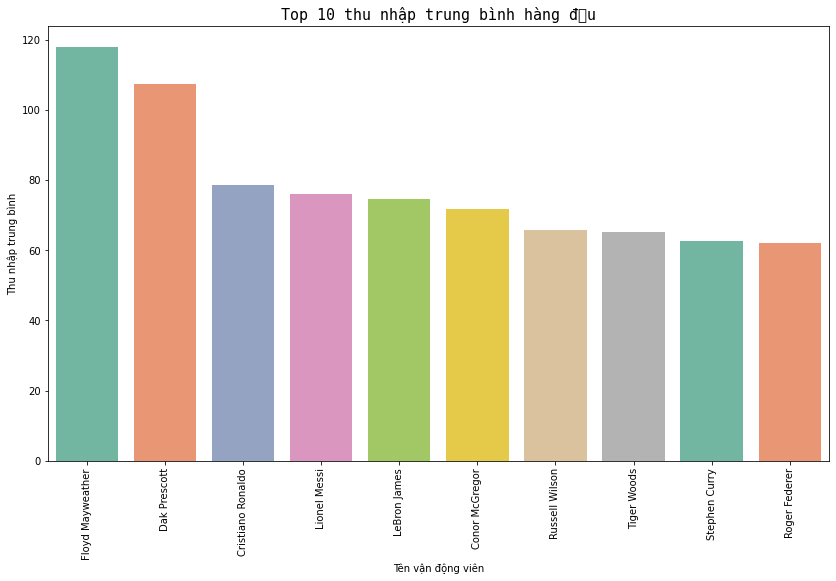

In [20]:
barplot_func(dataset=groupby3, 
             y='Earnings', 
             rotation=90, 
             title='Top 10 thu nhập trung bình hàng đầu', 
             xlabel='Tên vận động viên', 
             ylabel='Thu nhập trung bình')

# Quốc tịch nào phổ biến nhất trong số các vận động viên giàu nhất

In [22]:
df2 = pd.DataFrame(data=df['Nationality'].value_counts())
df3 = df2[df2.index != 'USA']
df2 = df2.nlargest(10, 'Nationality')
df3 = df3.nlargest(10, 'Nationality')


**Top 10 quốc gia hàng đầu với Hoa Kỳ**

In [23]:
fig = px.pie(values=df2['Nationality'], names=df2.index)
fig.show()

**Top 10 quốc gia hàng đầu không có Hoa Kỳ**

In [ ]:
fig = px.pie(values=df3['Nationality'], names=df3.index)
fig.show()